
# Medical Appointments Analysis

This notebook explores a dataset containing information about medical appointments, specifically focusing on factors that influence whether a patient shows up for their appointment or not. The dataset provides details such as age, gender, whether the patient received an SMS reminder, and if they have certain medical conditions, among other things.



## Questions for Analysis

1. What is the overall attendance rate for the appointments?
2. Does gender influence the probability of a no-show?
3. How does age affect the likelihood of a no-show?
4. Does receiving an SMS reminder impact the attendance rate?


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Wrangling

Before diving into the analysis, it's crucial to familiarize ourselves with the dataset and prepare it for exploration. This includes loading the data, checking for cleanliness, and then trimming and cleaning the dataset for analysis.



The dataset contains the following columns:

- `PatientId`: An identifier for the patient.
- `AppointmentID`: An identifier for the appointment.
- `Gender`: The gender of the patient.
- `ScheduledDay`: The day the patient scheduled the appointment.
- `AppointmentDay`: The actual appointment day.
- `Age`: The age of the patient.
- `Neighbourhood`: The location of the hospital.
- `Scholarship`: Whether the patient is enrolled in a scholarship program.
- `Hipertension`: Whether the patient has hypertension.
- `Diabetes`: Whether the patient has diabetes.
- `Alcoholism`: Whether the patient is an alcoholic.
- `Handcap`: The number of disabilities the patient has.
- `SMS_received`: Whether the patient received an SMS reminder for the appointment.
- `No-show`: Whether the patient missed the appointment (Yes if they did not show up, and No if they attended).


In [5]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Exploration

In [6]:
# Calculate the overall attendance rate
total_appointments = len(df)
attended_appointments = len(df[df['No-show'] == 'No'])
attendance_rate = (attended_appointments / total_appointments) * 100
attendance_rate

79.8067440534892

In [7]:
# Calculate no-show rates by gender
gender_group = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack()
gender_no_show_rate = gender_group['Yes'] * 100
gender_no_show_rate

Gender
F    20.314588
M    19.967948
Name: Yes, dtype: float64

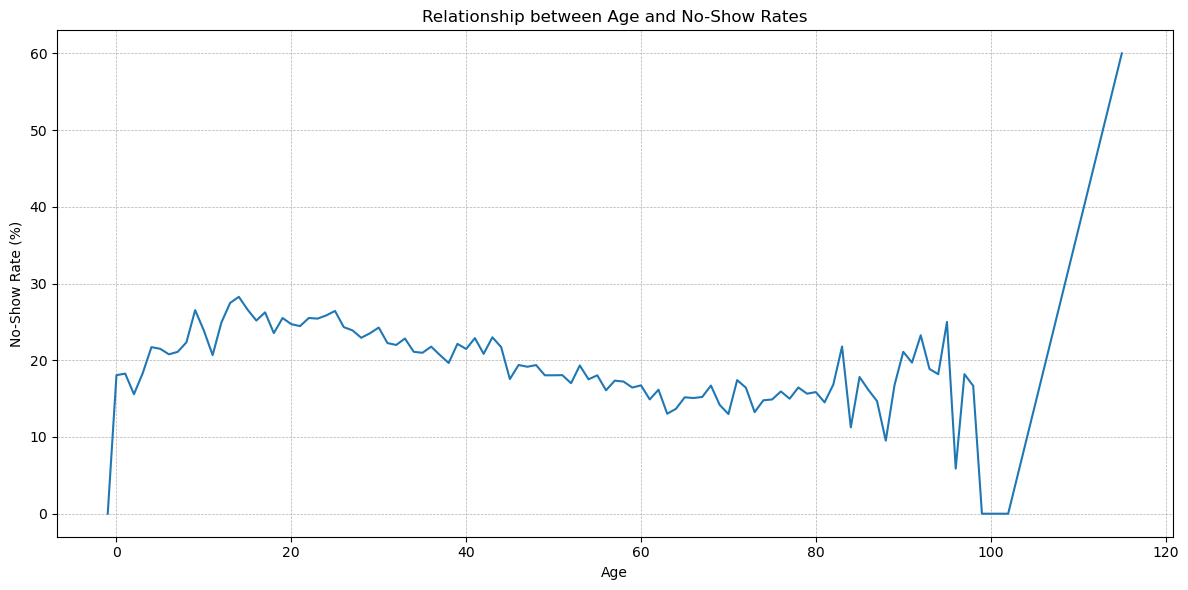

In [8]:
# Calculate no-show rates by age
age_group = df.groupby('Age')['No-show'].value_counts(normalize=True).unstack().fillna(0)
age_no_show_rate = age_group['Yes'] * 100

# Plotting the relationship between age and no-show rates
plt.figure(figsize=(12, 6))
age_no_show_rate.plot()
plt.title('Relationship between Age and No-Show Rates')
plt.xlabel('Age')
plt.ylabel('No-Show Rate (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [9]:
# Analyzing the impact of SMS_received on attendance rates
sms_group = df.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()
sms_no_show_rate = sms_group['Yes'] * 100
sms_no_show_rate

SMS_received
0    16.703311
1    27.574545
Name: Yes, dtype: float64

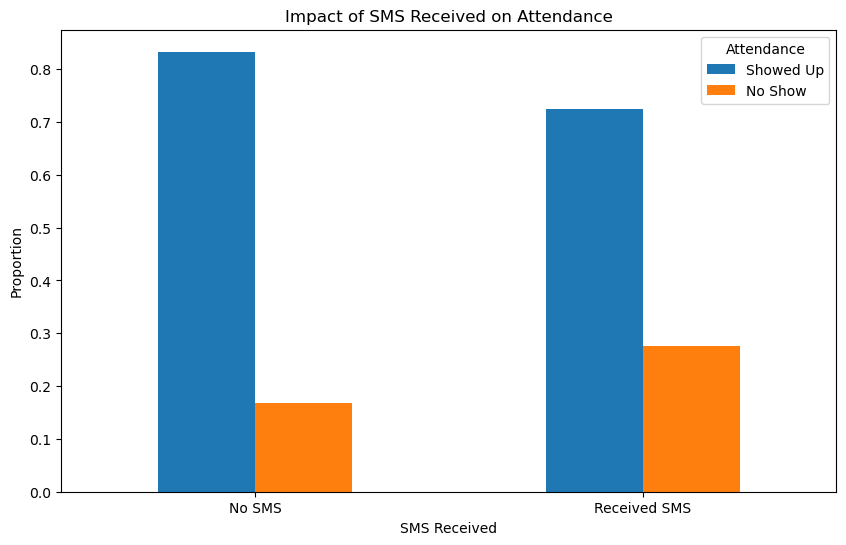

In [10]:
# Plotting the impact of SMS_received on attendance rates
sms_group.plot(kind='bar', figsize=(10,6))
plt.title('Impact of SMS Received on Attendance')
plt.ylabel('Proportion')
plt.xlabel('SMS Received')
plt.xticks([0,1], ['No SMS', 'Received SMS'], rotation=0)
plt.legend(title='Attendance', labels=['Showed Up', 'No Show'])
plt.show()

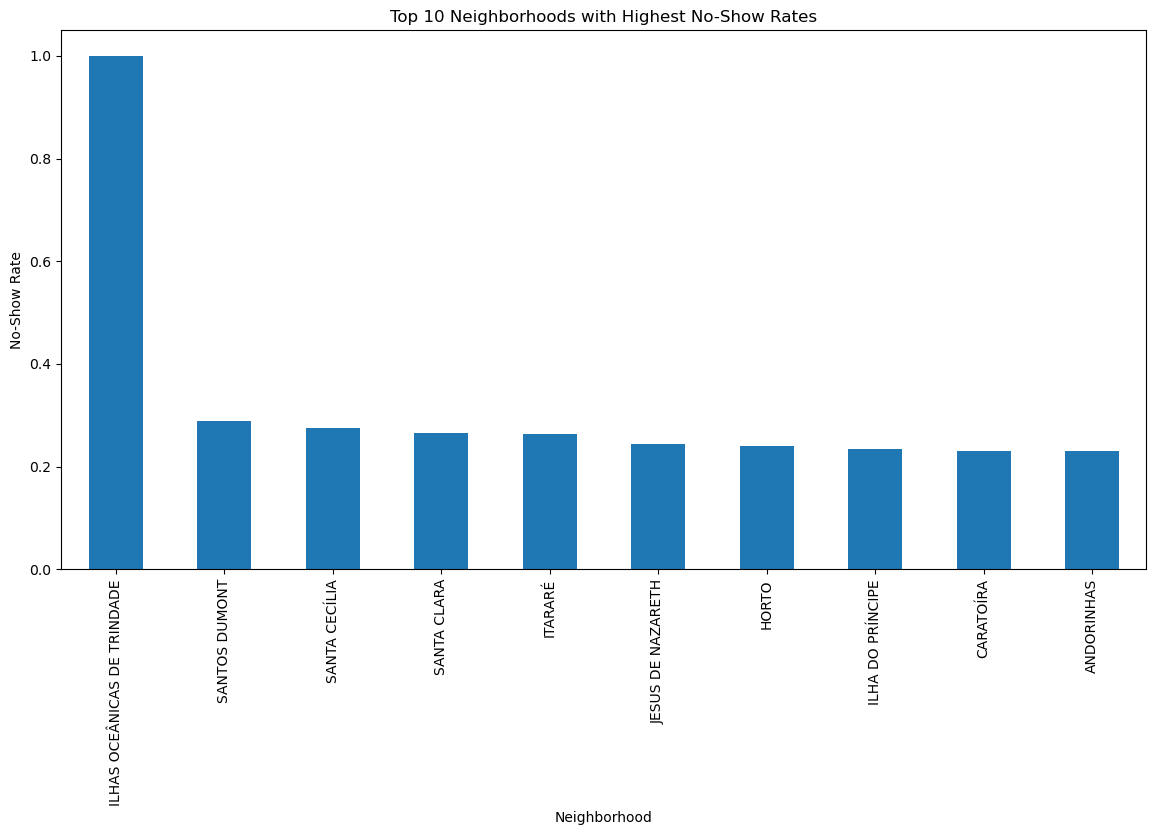

In [11]:
# Calculate no-show rates by neighborhood
neighborhood_group = df.groupby('Neighbourhood')['No-show'].value_counts(normalize=True).unstack().fillna(0)
neighborhood_no_show_rate = neighborhood_group['Yes'].sort_values(ascending=False)

# Plotting the top 10 neighborhoods with the highest no-show rates
top_neighborhoods = neighborhood_no_show_rate.head(10)
top_neighborhoods.plot(kind='bar', figsize=(14,7))
plt.title('Top 10 Neighborhoods with Highest No-Show Rates')
plt.ylabel('No-Show Rate')
plt.xlabel('Neighborhood')
plt.show()

## Conclusions and Limitations

### From our analysis, we observed the following:

1. The overall attendance rate for medical appointments is approximately 79.81%.
2. Both genders show a similar tendency to miss appointments.
3. Young adults (between ages 10 to 30) are more likely to miss appointments, while older individuals are more consistent in attending.
4. Patients who received an SMS reminder had a higher no-show rate compared to those who didn't, which is counterintuitive.
5. Certain neighborhoods exhibit higher no-show rates than others. This could be influenced by various factors such as the distance to the hospital, local transportation facilities, or socio-economic conditions.

### However, it's essential to note some limitations:

- Correlation does not imply causation. For example, even though we observed a higher no-show rate among those who received SMS reminders, it doesn't mean the SMS caused them to miss the appointment. There could be underlying factors not present in the dataset.

### Further research could involve:
- Collecting more granular data on reasons for no-shows.
- Conducting surveys to understand patients' behavior better.
- Implementing experimental designs like A/B tests to determine the efficacy of interventions like SMS reminders.